# Suicide Bomber game

In [3]:
import numpy as np

from two_agent_game import Game, SBAgent, suicide_bomber_pay_off, RPS_pay_off
import matplotlib.pyplot as plt
from typing import List

## Analyze Tools 

In [4]:
def average_strategy(
    member_list: List[SBAgent]
):
    strategy_count = np.zeros_like(member_list[0].strategy)
    for mem in member_list:
        if member_list[0].mixed_strategy:
            strategy_count += mem.strategy
        else:
            strategy_count[mem.decision()] += 1

    return strategy_count / len(member_list)

In [5]:
def plot_triangle(ax: plt.Axes, names: List[str]):
    ax.plot([0, 1, 0.5, 0], [0, 0, np.sqrt(3)/2, 0])
    ax.text(0, 0, names[0], ha="center", va="top")
    ax.text(1, 0, names[1], ha="center", va="top")
    ax.text(0.5, np.sqrt(3) / 2, names[2], ha="center", va="bottom")

def plot_prob_2D(prob_list, ax):
    # visualize a probability in 2D plane

    prob_list = np.array(prob_list)
    
    x = prob_list[:, 1] + prob_list[:, 2] / 2
    y = prob_list[:, 2] * np.sqrt(3) / 2

    ax.scatter(x[0:1], y[0:1])

    ax.plot(x, y)

## Suicide Bomber

In [6]:
benefit_kill = 0.5
cost = 0.1

In [7]:
suicide_bomber = suicide_bomber_pay_off(benefit_kill, cost)

game = Game(
    init_member_num=500,
    pay_off_matrix=suicide_bomber,
    mixed_strategy=True,
    random_seed=None,
)

#### Run

In [8]:
round_num = 200
game_in_round = 500

discard_rate = 0.1
mutation_rate = 0.001

In [9]:
ave_str_list = [average_strategy(game.current_members)]

In [10]:
for _ in range(round_num):
    
    game.multiple_game(game_in_round, cpu_num=8)
    game.discard_member_by_payoff(discard_rate)
    game.bear_new_member_by_payoff()
    game.reset_fitness()
    game.mutation(mutation_rate)

    ave_str_list.append(average_strategy(game.current_members))


#### Plot

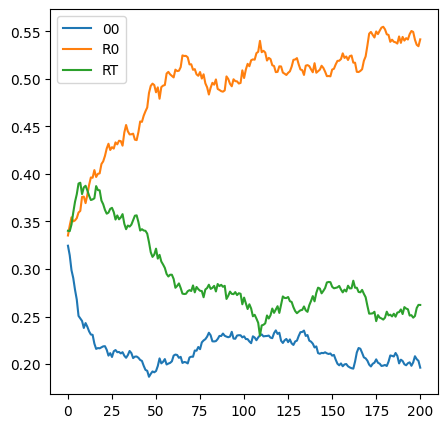

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(ave_str_list, label=["00", "R0", "RT"])
ax.legend()
plt.show()

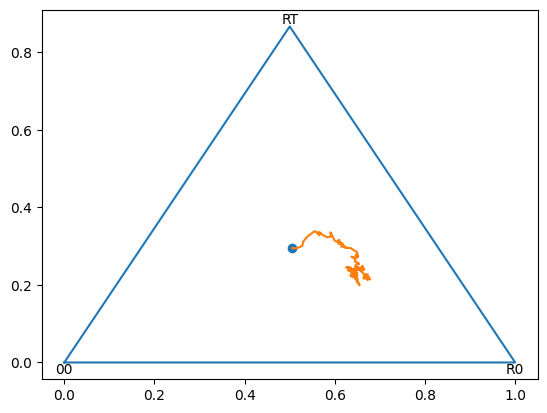

In [13]:
fig, ax = plt.subplots()
plot_triangle(ax, names=["00", "R0", "RT"])
plot_prob_2D(ave_str_list, ax)


## Rock Paper Scissors

In [14]:
win = 1
lose = 2

In [51]:
RPS = RPS_pay_off(win, lose)

game = Game(
    init_member_num=500,
    pay_off_matrix=RPS,
    mixed_strategy=True,
    random_seed=None,
)

#### Run

In [52]:
round_num = 200
game_in_round = 500

discard_rate = 0.07
mutation_rate = 0.005

In [53]:
ave_str_list = [average_strategy(game.current_members)]

In [54]:
for _ in range(round_num):
    
    game.multiple_game(game_in_round, cpu_num=8)
    game.discard_member_by_payoff(discard_rate)
    game.bear_new_member_by_payoff()
    game.reset_fitness()
    game.mutation(mutation_rate)

    ave_str_list.append(average_strategy(game.current_members))


#### Plot

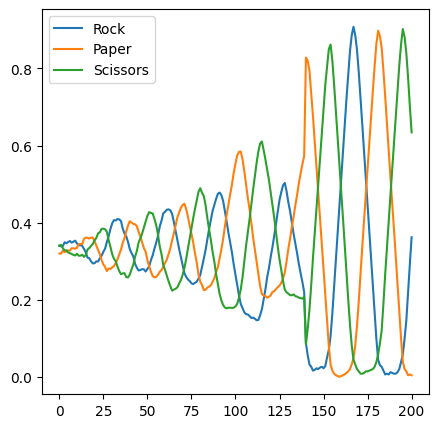

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(ave_str_list, label=["Rock", "Paper", "Scissors"])
ax.legend()
plt.show()

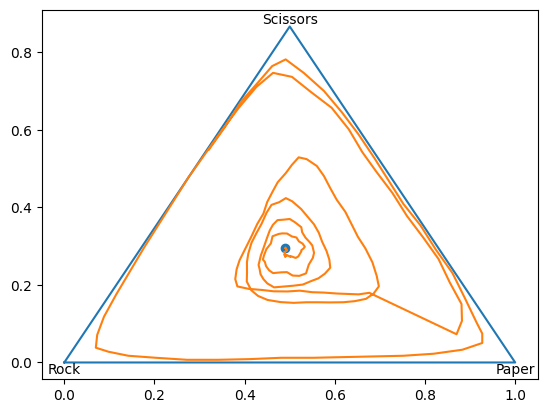

In [56]:
fig, ax = plt.subplots()
plot_triangle(ax, names=["Rock", "Paper", "Scissors"])
plot_prob_2D(ave_str_list, ax)